In [18]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 3
import seaborn as sns

# sns.set_context('talk|')?
import scipy.stats as ss
import math
from scipy.integrate import simpson, trapezoid
import numpy as np

import scipy.interpolate as interpolate
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
from scipy import integrate
import scipy.stats as ss

import riskSingleObserverValuation as model
import tools as tools


In [19]:

import riskSingleObserverValuation as model
import tools as tools



In [22]:
type = "prior"
line_frac = 0.0

2.0


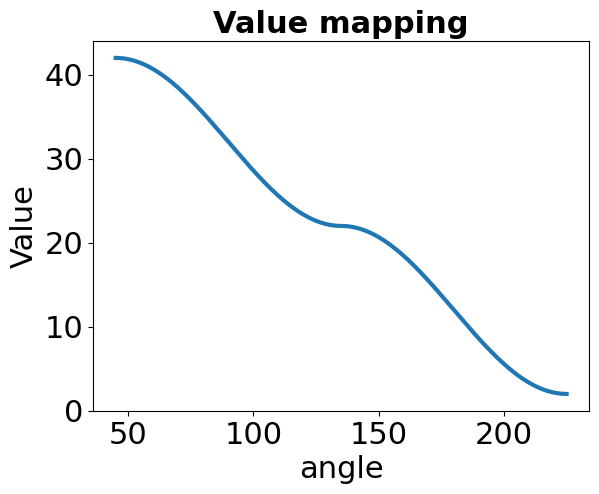

In [23]:
plt.plot(tools.stim_ori_grid*90/np.pi, tools.value_function_ori(tools.stim_ori_grid, type, line_frac))
# plt.plot(tools.stim_ori_grid, tools.value_function_ori(tools.stim_ori_grid, "cdf_prior", line_frac))
# plt.plot(tools.stim_ori_grid,(integrate.cumtrapz(tools.prior_ori(tools.stim_ori_grid), tools.stim_ori_grid, initial=0.0))*tools.factor_val+tools.min_val)

print(min(tools.value_function_ori(tools.stim_ori_grid, type, line_frac)))

plt.ylabel("Value")
plt.xlabel("angle")
plt.title("Value mapping", size = 22,fontweight="bold")

plt.savefig('/Users/sbedi/Downloads/teig.png',dpi=300, bbox_inches = "tight")


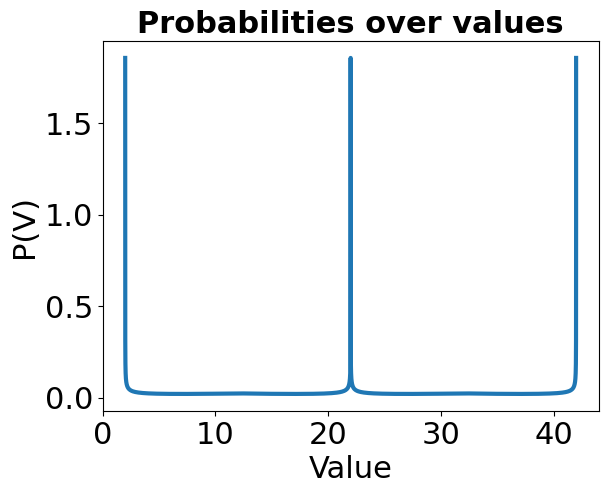

In [24]:

stim_val_grid, ps = model.prior_val(type, line_frac)

plt.plot(stim_val_grid, ps)

trapezoid(ps, stim_val_grid)

plt.ylabel("P(V)")
plt.xlabel("Value")
plt.title("Probabilities over values", size = 22,fontweight="bold")

plt.savefig('/Users/sbedi/Downloads/teig.png',dpi=300, bbox_inches = "tight")


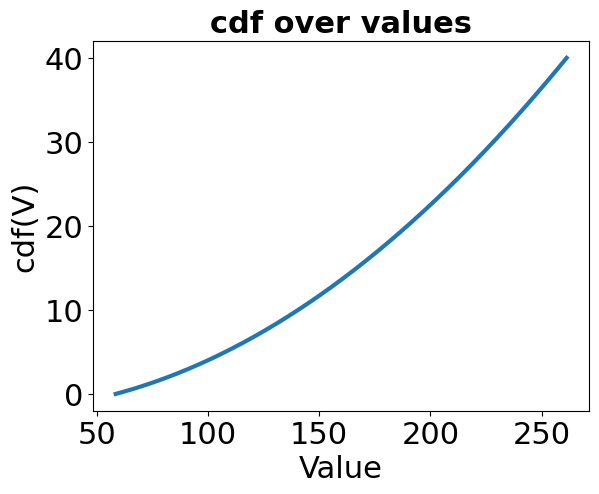

In [12]:
# stim_val_grid, ps = model.prior_val(type)
rep_val_grid, cdf_val = model.cdf_val(type)

plt.plot(rep_val_grid, cdf_val)

plt.ylabel("cdf(V)")
plt.xlabel("Value")
plt.title("cdf over values", size = 22,fontweight="bold")

plt.savefig('/Users/sbedi/Downloads/teig.png',dpi=300, bbox_inches = "tight")


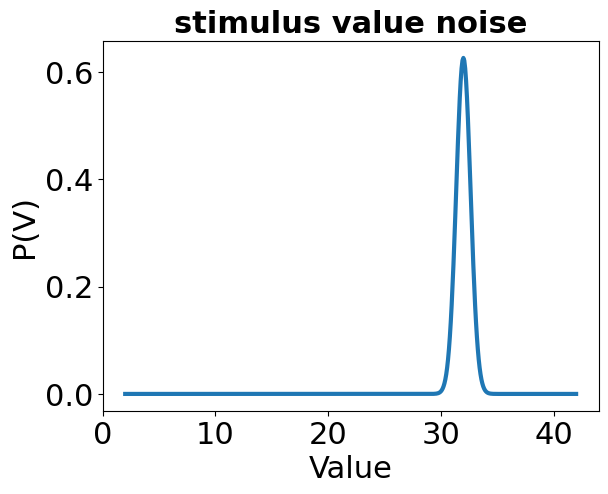

In [7]:
stim_val_grid, ps = model.stimulus_val_noise(0.5*np.pi, 100, model.stim_ori_grid, type)

plt.plot(stim_val_grid, ps[0,:])

plt.ylabel("P(V)")
plt.xlabel("Value")
plt.title("stimulus value noise", size = 22,fontweight="bold")

plt.savefig('/Users/sbedi/Downloads/teig.png',dpi=300, bbox_inches = "tight")


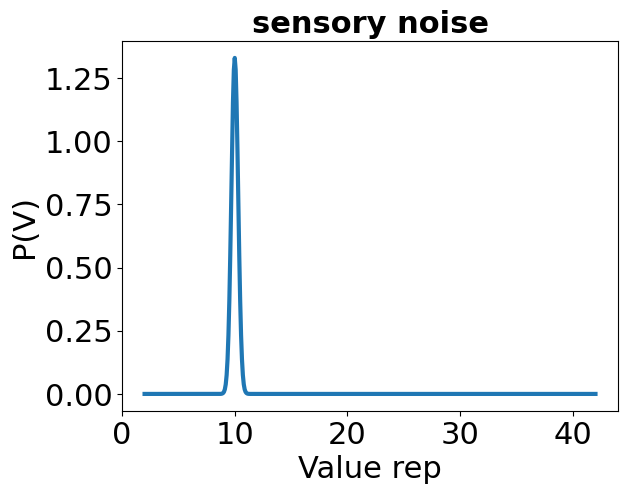

In [8]:
ps = model.sensory_noise(10, 0.3, model.rep_val_grid, type)

plt.plot(model.rep_val_grid, ps)

plt.ylabel("P(V)")
plt.xlabel("Value rep")
plt.title("sensory noise", size = 22,fontweight="bold")

plt.savefig('/Users/sbedi/Downloads/teig.png',dpi=300, bbox_inches = "tight")

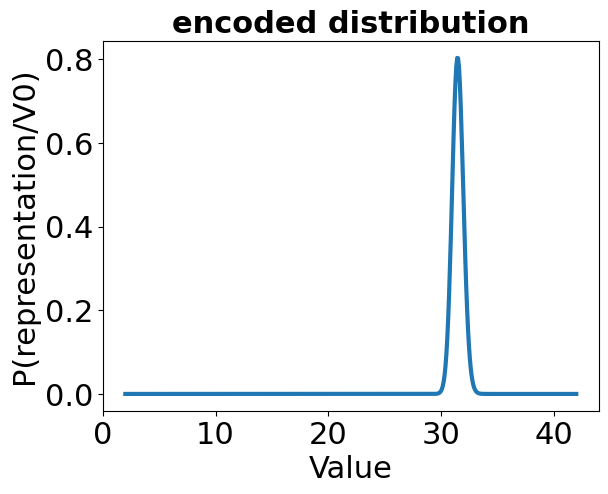

In [13]:

p_m_given_theta0, p_m_given_val = model.value_efficient_encoding(14./90.*np.pi, 100, 0.07, type)

# p_m_given_theta[np.argsort(tools.value_function_ori(tools.stim_ori_grid, type))]

# plt.plot(model.rep_val_grid, p_m_given_theta0[0])

plt.plot(model.rep_val_grid, p_m_given_val[400])

plt.ylabel("P(representation/V0)")
plt.xlabel("Value")
plt.title("encoded distribution", size = 22,fontweight="bold")

plt.savefig('/Users/sbedi/Downloads/teig.png',dpi=300, bbox_inches = "tight")



[[0.49238497]]


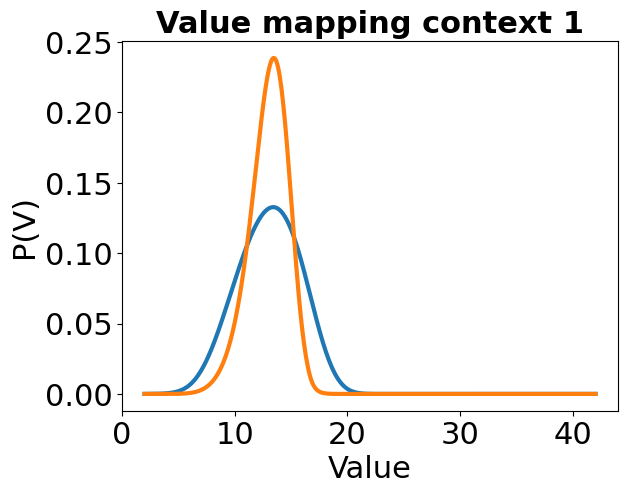

In [4]:

theta0 = 130/90.*np.pi
kappa_s = 1000
sigma_rep = np.sqrt(tools.factor_val/16) # The division is with teh analog of kappa

risk_prob = 0.75
type = "linearDecrease"
theta1 = float(tools.inverse_monotonic(tools.value_function_ori(theta0, type)/risk_prob, type))


safe_value, safe_prob = model.value_bayesian_decoding(theta0, kappa_s, sigma_rep, type)
rr, risky_prob = model.risky_value_dist(theta1, kappa_s, sigma_rep, risk_prob, type)

plt.plot(safe_value, safe_prob[0])
plt.plot(rr, risky_prob[0])

p_chose_risky = tools.diff_dist(safe_value, risky_prob, safe_prob)
print(p_chose_risky)

plt.xlabel("Value")
plt.ylabel("P(V)")
plt.title("Value mapping context 1", size = 22,fontweight="bold")

plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")


In [5]:
abs(trapezoid(safe_prob[0], safe_value, axis = -1))

1.0

# risk simulations

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 3
import seaborn as sns




# sns.set_context('talk|')?
import scipy.stats as ss
import math
from scipy.integrate import simpson, trapezoid
import numpy as np

import scipy.interpolate as interpolate
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
from scipy import integrate
import scipy.stats as ss

import riskSingleObserverValuation as model
import tools as tools

0.744212778497561

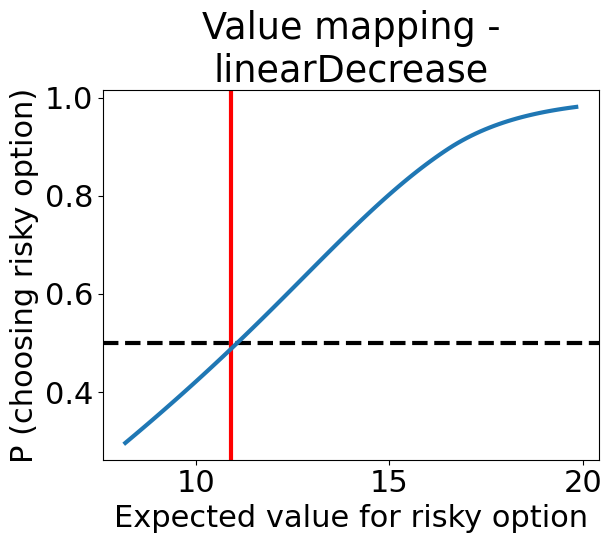

In [7]:
# setting parameters
experimentEffects = "00to180"#"00to45"
risk_prob = 0.75
type = "linearDecrease" 

stim_noise = 10000
rep_noise = np.sqrt(tools.factor_val/8)
start = 140/90*np.pi

# Getting all the values from actual transformation
interval = 70/90.*np.pi
if (type=="prior" or type=="linearDecrease" or type=="curvedPrior"):
    rangeOri = np.linspace(start, (start-interval), 100)
else:
    rangeOri = np.linspace(start, (start+interval), 100)

val_range = tools.value_function_ori(rangeOri, type)
safeVal = val_range[0]
riskyVal_range = risk_prob*tools.value_function_ori(rangeOri, type)

# getting inferred safe values
safe_value, safe_prob = model.safe_value_dist(rangeOri[0], stim_noise, rep_noise, type)
risky_value, risky_prob = model.risky_value_dist((rangeOri), stim_noise, rep_noise, risk_prob, type)


# # Risk attitudes 
p_chose_risky = tools.diff_dist(safe_value, risky_prob, safe_prob)

# The value of the safe option
plt.axvline(safeVal, c='r', label = "safe option\n value")
# Where the risky option value is the same as the safe option value,
# the probability of chosing should have been 0.5 i there were no biases at all.
plt.axhline(0.5, c='k', ls='--')
# plt.ylim(0.4,0.6)

# Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
# and whether it is equal to the actual rational equilibrium that would have been without biases.
plt.plot(riskyVal_range, np.squeeze(p_chose_risky))#, label=['rep',kappa_r, "stim (deg)",round(kappa_s*180,2)])

plt.xlabel("Expected value for risky option")
plt.ylabel("P (choosing risky option)")
plt.title("Value mapping -\n" + type) 

# plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

tools.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)



# comparing models : same noise regimes fopr safe and risky option

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 3
import seaborn as sns
# sns.set_context('talk|')
import scipy.stats as ss
import math
from scipy.integrate import simpson, trapezoid
import numpy as np

import scipy.interpolate as interpolate
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
from scipy import integrate
import scipy.stats as ss

import riskSingleObserverValuation as model
import tools as tools


In [8]:
def rnp_across_safeVals(stim_noise, rep_noise, type, risk_prob, experimentEffects):

    # Getting all the values from actual transformation
    end = int(experimentEffects[-3:])-1
    start = int(experimentEffects[0:2])+1
    end = end/90.*np.pi
    start = start/90.*np.pi
    
    if (type=="prior" or type=="curvedPrior" or type =="linearDecrease"):
        start_safe = float(tools.inverse_monotonic(tools.value_function_ori(start, type)/1.5, type))
        safe_angles =  np.linspace(end, start_safe, int((end*90/np.pi-start_safe*90/np.pi+1)/3))
    else:
        end_safe = float(tools.inverse_monotonic(tools.value_function_ori(end, type)/1.5, type))
        safe_angles =  np.linspace(start, end_safe, int((start*90/np.pi+end_safe*90/np.pi-1)/3))
    
    # print("safe angles - ",safe_angles)
    rnp = np.zeros(len(safe_angles))
    safeVals = np.zeros(len(safe_angles))

    for i in range(len(safe_angles)):
        interval = abs(float(tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type), type)-tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type)*1.5, type)))
        if (type=="prior" or type=="curvedPrior" or type=="linearDecrease"):
            rangeOri = np.linspace(safe_angles[i],  safe_angles[i]-(interval), 20)
        else:
            rangeOri = np.linspace(safe_angles[i],  safe_angles[i]+(interval), 20)

        # print("range - ", rangeOri)
        # print("interval - ",interval)

        safeVal = float(tools.value_function_ori(safe_angles[i], type))
        safeVals[i] = safeVal
        val_range = tools.value_function_ori(rangeOri, type)
        riskyVal_range = risk_prob*tools.value_function_ori(rangeOri, type)

        # getting inferred safe values
        safe_value, safe_prob = model.safe_value_dist(safe_angles[i], stim_noise, rep_noise , type)
        rr, risky_prob = model.risky_value_dist((rangeOri), stim_noise, rep_noise, risk_prob, type)

        # Risk attitudes 
        p_chose_risky = tools.diff_dist(safe_value, risky_prob, safe_prob)
        print("safe angle - ", safe_angles[i]*90./np.pi)
        # print(p_chose_risky[0,::2])
        rnp[i] = tools.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)
        print(rnp[i])

    return safe_angles, safeVals, rnp



safe angle -  1.0
-1.2018129926750942
safe angle -  4.115675675675676
0.5905195041550964
safe angle -  7.231351351351352
0.7216544836803452
safe angle -  10.347027027027028
0.7510054061778553
safe angle -  13.462702702702705
0.7522984103393412
safe angle -  16.578378378378382
0.7511199977914865
safe angle -  19.694054054054057
0.750672656202089
safe angle -  22.809729729729735
0.7504027092622192
safe angle -  25.925405405405407
0.7503028742381469
safe angle -  29.041081081081085
0.7502549281980331
safe angle -  32.15675675675676
0.7502719529425544
safe angle -  35.27243243243244
0.7503577475198299
safe angle -  38.38810810810811
0.7504989064327806
safe angle -  41.50378378378379
0.7506920658770523
safe angle -  44.61945945945946
0.750856887288282
safe angle -  47.735135135135145
0.7509783552610882
safe angle -  50.85081081081082
0.7510636803422326
safe angle -  53.966486486486495
0.7510371682671928
safe angle -  57.08216216216216
0.7508981447863683
safe angle -  60.19783783783785
0.750

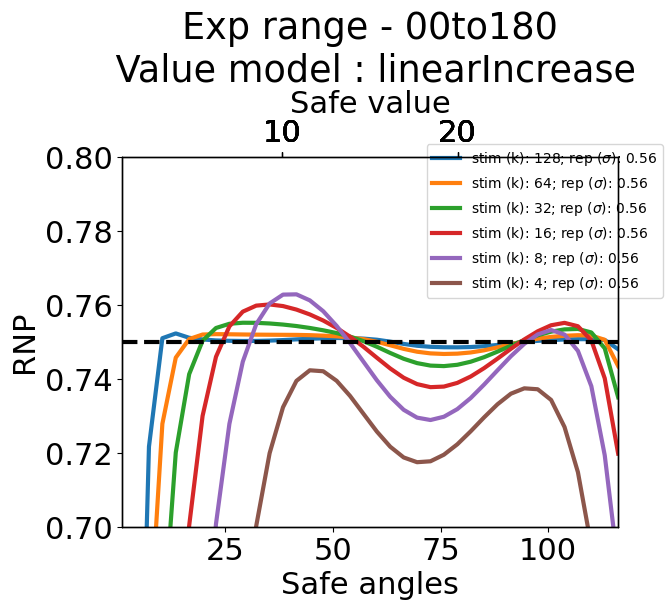

In [9]:
# setting parameters
experimentEffects = tools.experimentRange #"00to45"
risk_prob = 0.75
type = "linearIncrease" 

# changeable parameters
# stim_list = [10000]
# rep_list = [np.sqrt(tools.factor_val/64), np.sqrt(tools.factor_val/32), np.sqrt(tools.factor_val/16), np.sqrt(tools.factor_val/8), np.sqrt(tools.factor_val/4)]
stim_list = [128, 64, 32, 16, 8, 4]
rep_list = [np.sqrt(tools.factor_val/128)]


fig = plt.figure()
ax1 = fig.add_subplot(111)

for stim_noise in stim_list:
    for rep_noise in rep_list:

        safe_angles, safeVals, rnp = rnp_across_safeVals(stim_noise, rep_noise, type, risk_prob, experimentEffects)
        ax1.set_ylim(0.7, 0.8)
        ax1.set_xlim(min(safe_angles*90./np.pi), max(safe_angles*90./np.pi))

        text = "stim (k): "+ str(stim_noise)+"; rep ($\sigma$): "+str(round(rep_noise,2))
        ax1.plot(safe_angles[:]*90./np.pi, rnp[:], label = text)


        ax2 = ax1.twiny()
        if (type=="prior" or type=="curvedPrior" or type=="linearDecrease"):
            ax2.set_xlim(max(safeVals), min(safe_angles))

        ax2.plot(safeVals, np.ones(len(safeVals))/1.3, alpha=0.0)

ax1.axhline(risk_prob, c='k', ls='--')
ax1.legend(bbox_to_anchor=(0.6, 0.6), prop={'size': 10})

ax2.set_xlabel("Safe value")
ax1.set_xlabel("Safe angles")
ax1.set_ylabel("RNP")
ax1.set_title("Exp range - " + tools.experimentRange + "\n Value model : " + type) 


plt.savefig('/Users/sbedi/Downloads/testfigVal.png',dpi=300, bbox_inches = "tight")

# different noises

In [13]:

def rnp_safeVals_diffNoises(safeNoise, riskyNoise, type, risk_prob, experimentEffects):

    # Getting all the values from actual transformation
    end = int(experimentEffects[-3:])-1
    start = int(experimentEffects[0:2])+1
    end = end/90.*np.pi
    start = start/90.*np.pi
    
    if (type=="prior" or type=="linearPrior" or type=="curvedPrior"):
        start_safe = float(tools.inverse_monotonic(tools.value_function_ori(start, type)/1.5, type))
        safe_angles =  np.linspace(end, start_safe, int((end*90/np.pi-start_safe*90/np.pi+1)/3))
    else:
        end_safe = float(tools.inverse_monotonic(tools.value_function_ori(end, type)/1.5, type))
        safe_angles =  np.linspace(start, end_safe, int((start*90/np.pi+end_safe*90/np.pi-1)/3))
    
    rnp = np.zeros(len(safe_angles))
    safeVals = np.zeros(len(safe_angles))

    for i in range(len(safe_angles)):
        interval = abs(float(tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type), type)-tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type)*1.5, type)))
        if (type=="prior" or type=="linearPrior" or type=="curvedPrior"):
            rangeOri = np.linspace(safe_angles[i],  safe_angles[i]-(interval), 20)
        else:
            rangeOri = np.linspace(safe_angles[i],  safe_angles[i]+(interval), 20)


        safeVal = tools.value_function_ori(safe_angles[i], type)
        safeVals[i] = safeVal
        val_range = tools.value_function_ori(rangeOri, type)
        riskyVal_range = risk_prob*tools.value_function_ori(rangeOri, type)

        # getting inferred safe values
        safe_value, safe_prob = model.value_bayesian_decoding(safe_angles[i], safeNoise[0], safeNoise[1], type)
        risky_value, risky_prob = model.risky_value_dist((rangeOri), riskyNoise[0], riskyNoise[1], risk_prob, type)

        # Risk attitudes 
        p_chose_risky = tools.diff_dist(safe_value, risky_prob, safe_prob)
        rnp[i] = tools.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)
    return safe_angles, safeVals, rnp

    

/Users/sbedi/git/Information-and-Value/encoding_decoding/riskSingleObserverValuation.py:137: RuntimeWarning: invalid value encountered in true_divide
  p_val_given_m = p_val_given_m / trapezoid(p_val_given_m, safe_value, axis=0)[np.newaxis,:]
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


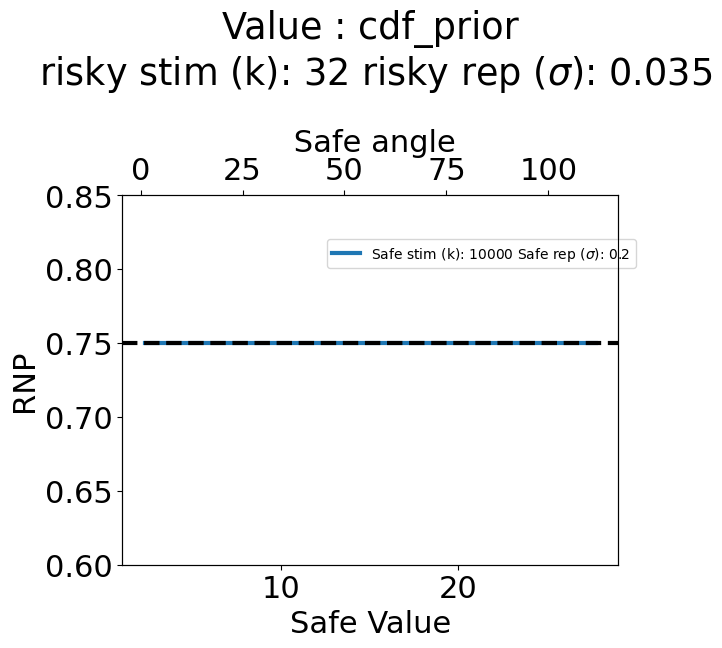

In [14]:

# setting parameters
experimentEffects = "00to180"#"00to45"
risk_prob = 0.75
type = "cdf_prior" 

# changeable parameters
high_stim_list = [32]
low_stim_list = [10000]
high_rep_list = [np.sqrt(tools.factor_val/8)]
low_rep_list = [np.sqrt(tools.factor_val/64)]

fig = plt.figure()
ax1 = fig.add_subplot(111)

for high_stim_noise in high_stim_list:
    for high_rep_noise in high_rep_list:
        for low_stim_noise in low_stim_list:
            for low_rep_noise in low_rep_list:

                safeNoise = [low_stim_noise, high_rep_noise]
                riskyNoise = [high_stim_noise, low_rep_noise]

                safe_angles, safeVals, rnp = rnp_safeVals_diffNoises(safeNoise, riskyNoise, type, risk_prob, experimentEffects)

                ax1.set_ylim(0.6, 0.85)

                text = "Safe stim (k): "+ str(safeNoise[0])+" Safe rep ($\sigma$): "+str(safeNoise[1])
                # text = "Risky stim (k): "+ str(riskyNoise[0])+"; Risky rep ($\sigma$): "+str(riskyNoise[1])


                ax1.plot(safeVals[:], rnp[:], label = text)

                ax2 = ax1.twiny()
                if (type=="prior" or type=="linearPrior" or type=="curvedPrior"):
                    ax2.set_xlim(max(safe_angles*90./np.pi), min(safe_angles*90./np.pi))
                ax2.plot(safe_angles*90./np.pi, np.ones(len(safe_angles))/1.3, alpha=0.0)

ax1.axhline(risk_prob, c='k', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 0.9), prop={'size': 10})

ax2.set_xlabel("\n Safe angle")
ax1.set_xlabel("Safe Value")
ax1.set_ylabel("RNP")
# if len(safeNoise[0])==1 and len(safeNoise[1])==1:
# ax1.set_title("Value : " + type + "\n safe stim (k): "+str(safeNoise[0])+"; safe rep ($\sigma$): "+str(safeNoise[1]))
# else:
ax1.set_title("Value : " + type + "\n risky stim (k): "+str(riskyNoise[0])+" risky rep ($\sigma$): "+str(riskyNoise[1]))
plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

# just for a safe angle

0.7487306247602967

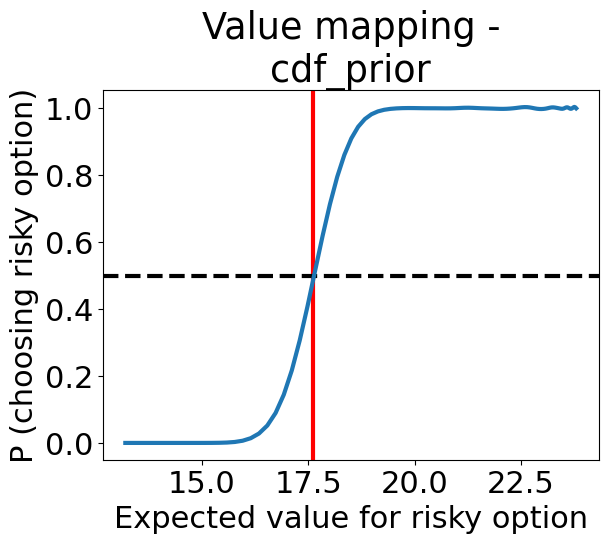

In [13]:
# setting parameters
experimentEffects = "00to180"#"00to45"
risk_prob = 0.75
type = "cdf_prior" 

stim_noise = 10000
rep_noise = 0.07
start = 80

# Getting all the values from actual transformation
interval = 50
rangeOri = np.linspace(start/90., (start+interval)/90., 100)*np.pi
val_range = tools.value_function_ori(rangeOri, type)
safeVal = val_range[0]
riskyVal_range = risk_prob*tools.value_function_ori(rangeOri, type)


# getting inferred safe values
safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], stim_noise, rep_noise, type)
risky_value, risky_prob = model.risky_value_dist((rangeOri), stim_noise, rep_noise, risk_prob, type)


# # Risk attitudes 
p_chose_risky = tools.diff_dist(safe_value, risky_prob, safe_prob)

# The value of the safe option
plt.axvline(safeVal, c='r', label = "safe option\n value")
# Where the risky option value is the same as the safe option value,
# the probability of chosing should have been 0.5 i there were no biases at all.
plt.axhline(0.5, c='k', ls='--')
# plt.ylim(0.4,0.6)

# Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
# and whether it is equal to the actual rational equilibrium that would have been without biases.
plt.plot(riskyVal_range, np.squeeze(p_chose_risky))#, label=['rep',kappa_r, "stim (deg)",round(kappa_s*180,2)])

plt.xlabel("Expected value for risky option")
plt.ylabel("P (choosing risky option)")
plt.title("Value mapping -\n" + type) 

# plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

tools.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)

